In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_pickle('endowment2.pkl')
df.head()

,college,admission_rate,admission_yield,tuition,control,graduation_rate,financialaid_rate,endowment,name,par_mean,...,sat_75,sat_math,sat_reading,enrollment,grad_pct,public,log_endowment,sqrt_endowment,log_k_mean,sqrt_k_mean
0,auburn university,83.0,29.0,9852.0,Public,63.0,76.0,22092.0,auburn university,219521.834635,...,1890.0,0.343915,0.328042,24864.0,0.203708,1,10.002971,148.633778,10.686174,209.157385
2,samford university,77.0,29.0,26328.0,Private not-for-profit,64.0,98.0,60561.0,samford university,256059.695312,...,1850.0,0.329730,0.340541,4833.0,0.376578,0,11.011406,246.091446,10.639140,204.295977
3,university of south alabama,86.0,45.0,6948.0,Public,27.0,91.0,11350.0,university of south alabama,92002.733724,...,1635.0,0.345566,0.336391,15065.0,0.249452,1,9.336973,106.536379,10.357965,177.502131
4,spring hill college,46.0,14.0,30924.0,Private not-for-profit,55.0,100.0,15871.0,spring hill college,170054.690104,...,1810.0,0.331492,0.331492,1422.0,0.091421,0,9.672249,125.980157,10.562392,196.604886
7,john brown university,70.0,38.0,22734.0,Private not-for-profit,65.0,99.0,38304.0,john brown university,127542.771701,...,1890.0,0.338624,0.338624,2596.0,0.198767,0,10.553310,195.714077,10.350701,176.858588


In [4]:
''.join([column + '+' for column in df.columns])

'college+admission_rate+admission_yield+tuition+control+graduation_rate+financialaid_rate+endowment+name+par_mean+k_mean+age+sat_75+sat_math+sat_reading+enrollment+grad_pct+public+log_endowment+sqrt_endowment+log_k_mean+sqrt_k_mean+'

In [5]:
# Model 1: All variables

formula1 = (
    'endowment~'
    'admission_rate+'
    'admission_yield+'
    'tuition+'
    'public+'
    'enrollment+'
    'grad_pct+'
    'graduation_rate+'
    'financialaid_rate+'
    'par_mean+'
    'k_mean+'
    'age+'
    'sat_75+'
    'sat_math+'
    'sat_reading'
)

y1, X1 = patsy.dmatrices(formula1, data=df, return_type="dataframe")

# Fit and summarize OLS model
model1 = sm.OLS(y1, X1)
fit1 = model1.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              endowment   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     40.99
Date:                Tue, 16 Apr 2019   Prob (F-statistic):           1.21e-65
Time:                        13:50:10   Log-Likelihood:                -4954.6
No. Observations:                 373   AIC:                             9939.
Df Residuals:                     358   BIC:                             9998.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4.429e+05   8.64e+05     -0.513      0.609   -2.14e+06    1.26e+06
admission_rate    -2029.3891    547.933     -3.704      0.000   -3106.961    -951.817
admission_yield    3324.7912    744.050      4.469      0.000    1861.533    4788.050
tuition              -3.3378      2.090     -1.597      0.111      -7.448       0.773
public            -6.059e+04   4.53e+04     -1.337      0.182    -1.5e+05    2.85e+04
enrollment           -4.2139      1.148     -3.670      0.000      -6.472      -1.956
grad_pct          -6.604e+04   5.73e+04     -1.152      0.250   -1.79e+05    4.67e+04
graduation_rate   -1156.0951    932.794     -1.239      0.216   -2990.539     678.349
financialaid_rate  1775.5430   1019.435      1.742      0.082    -229.292    3780.378
par_mean              0.4877      0.129      3.792      0.000       0.235       0.741
k_mean                5.1639      0.994      5.195      0.000       3.209       7.119
age                 552.0261    178.420      3.094      0.002     201.143     902.910
sat_75              233.1402     79.072      2.948      0.003      77.637     388.643
sat_math          -1.308e+06   1.36e+06     -0.959      0.338   -3.99e+06    1.37e+06
sat_reading        7.762e+05   1.58e+06      0.493      0.623   -2.32e+06    3.88e+06
==============================================================================
Omnibus:                      319.402   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12070.541
Skew:                           3.305   Prob(JB):                         0.00
Kurtosis:                      30.073   Cond. No.                     6.38e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

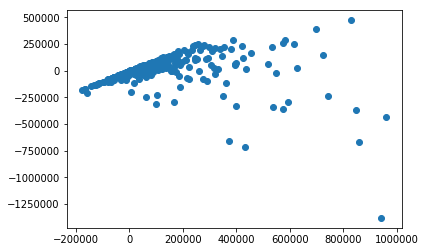

In [6]:
pred1 = fit1.predict(X1)
res1 = np.array(pred1).reshape(373,1) - np.array(y1)

plt.scatter(pred1,res1);
plt.show()
#sm.qqplot(res1)

In [7]:
# Model 2: Log transform and all variables

formula2 = (
    'log_endowment~'
    'admission_rate+'
    'admission_yield+'
    'tuition+'
    'public+'
    'enrollment+'
    'grad_pct+'
    'graduation_rate+'
    'financialaid_rate+'
    'par_mean+'
    'k_mean+'
    'age+'
    'sat_75+'
    'sat_math+'
    'sat_reading'
)

y2, X2 = patsy.dmatrices(formula2, data=df, return_type="dataframe")

# Fit and summarize OLS model
model2 = sm.OLS(y2, X2)
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_endowment   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     92.79
Date:                Tue, 16 Apr 2019   Prob (F-statistic):          9.20e-110
Time:                        13:50:10   Log-Likelihood:                -418.33
No. Observations:                 373   AIC:                             866.7
Df Residuals:                     358   BIC:                             925.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.9321      4.518     -0.649      0.517     -11.816       5.952
admission_rate       -0.0088      0.003     -3.065      0.002      -0.014      -0.003
admission_yield       0.0084      0.004      2.152      0.032       0.001       0.016
tuition            2.598e-05   1.09e-05      2.378      0.018    4.49e-06    4.75e-05
public               -0.5308      0.237     -2.240      0.026      -0.997      -0.065
enrollment        -1.314e-05      6e-06     -2.189      0.029   -2.49e-05   -1.34e-06
grad_pct             -1.2365      0.300     -4.127      0.000      -1.826      -0.647
graduation_rate       0.0034      0.005      0.699      0.485      -0.006       0.013
financialaid_rate     0.0101      0.005      1.888      0.060      -0.000       0.021
par_mean           1.184e-06   6.72e-07      1.762      0.079   -1.38e-07    2.51e-06
k_mean             7.834e-06    5.2e-06      1.507      0.133   -2.39e-06    1.81e-05
age                   0.0043      0.001      4.562      0.000       0.002       0.006
sat_75                0.0027      0.000      6.553      0.000       0.002       0.004
sat_math              9.5667      7.127      1.342      0.180      -4.449      23.582
sat_reading           8.1379      8.238      0.988      0.324      -8.063      24.339
==============================================================================
Omnibus:                        3.584   Durbin-Watson:                   1.721
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                4.134
Skew:                          -0.057   Prob(JB):                        0.127
Kurtosis:                       3.503   Cond. No.                     6.38e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

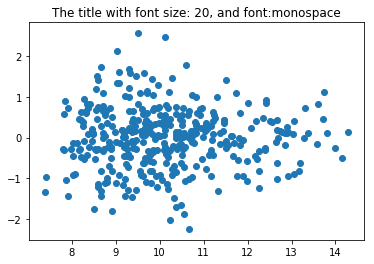

In [47]:
pred2 = fit2.predict(X2)
res2 = np.array(pred2).reshape(373,1) - np.array(y2)
plt.title('The title with font size: 20, and font:monospace')
plt.scatter(pred2,res2);
plt.show()

In [9]:
formula3 = (
    'k_mean~'
    'par_mean'
)

y3, X3 = patsy.dmatrices(formula3, data=df, return_type="dataframe")

# Fit and summarize OLS model
model3 = sm.OLS(y3, X3)
fit3 = model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 k_mean   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     342.9
Date:                Tue, 16 Apr 2019   Prob (F-statistic):           1.10e-54
Time:                        13:50:11   Log-Likelihood:                -3981.5
No. Observations:                 373   AIC:                             7967.
Df Residuals:                     371   BIC:                             7975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.811e+04    948.010     29.655      0.000    2.62e+04       3e+04
par_mean       0.0755      0.004     18.518      0.000       0.067       0.084
==============================================================================
Omnibus:                      115.465   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.633
Skew:                           1.236   Prob(JB):                    1.34e-121
Kurtosis:                       8.450   Cond. No.                     4.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

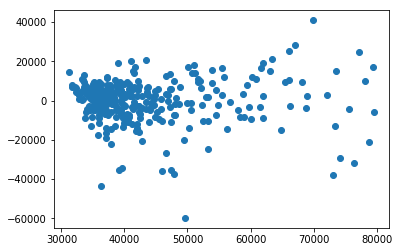

In [10]:
pred3 = fit3.predict(X3)
res3 = np.array(pred3).reshape(373,1) - np.array(y3)

plt.scatter(pred3,res3);
plt.show()

In [46]:
# Model 2: Log transform and all variables

formula4 = (
    'log_endowment~'
    'admission_rate+'
    'admission_yield+'
    'tuition+'
    'public+'
    'enrollment+'
    'grad_pct+'
    'financialaid_rate+'
    'par_mean+'
    'k_mean+'
    'age+'
    'sat_75+'
    'sat_reading'
)

y4, X4 = patsy.dmatrices(formula4, data=df, return_type="dataframe")

# Fit and summarize OLS model
model4 = sm.OLS(y4, X4)
fit4 = model4.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_endowment   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     108.0
Date:                Tue, 16 Apr 2019   Prob (F-statistic):          2.57e-111
Time:                        15:18:50   Log-Likelihood:                -419.49
No. Observations:                 373   AIC:                             865.0
Df Residuals:                     360   BIC:                             916.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3538      2.331      1.010      0.313      -2.231       6.939
admission_rate       -0.0083      0.003     -2.931      0.004      -0.014      -0.003
admission_yield       0.0080      0.004      2.091      0.037       0.000       0.016
tuition            2.716e-05   1.07e-05      2.548      0.011    6.19e-06    4.81e-05
public               -0.5206      0.237     -2.198      0.029      -0.986      -0.055
enrollment        -1.208e-05   5.92e-06     -2.039      0.042   -2.37e-05   -4.31e-07
grad_pct             -1.3096      0.289     -4.532      0.000      -1.878      -0.741
financialaid_rate     0.0098      0.005      1.848      0.065      -0.001       0.020
par_mean           1.033e-06   6.64e-07      1.555      0.121   -2.73e-07    2.34e-06
k_mean             1.053e-05   4.85e-06      2.171      0.031     9.9e-07    2.01e-05
age                   0.0043      0.001      4.641      0.000       0.002       0.006
sat_75                0.0028      0.000      7.833      0.000       0.002       0.004
sat_reading           1.7515      6.959      0.252      0.801     -11.934      15.437
==============================================================================
Omnibus:                        4.217   Durbin-Watson:                   1.711
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                5.180
Skew:                          -0.055   Prob(JB):                       0.0750
Kurtosis:                       3.567   Cond. No.                     4.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# Model 2: Log transform and all variables

formula5 = (
    'log_endowment~'
    'admission_rate+'
    'admission_yield+'
    'tuition+'
    'public+'
    'enrollment+'
    'grad_pct+'
    'graduation_rate+'
    'financialaid_rate+'
    'par_mean+'
    'k_mean+'
    'age+'
    'sat_75+'
    'sat_math+'
    'sat_reading'
)

y5, X5 = patsy.dmatrices(formula5, data=df, return_type="dataframe")

# Fit and summarize OLS model
model5 = sm.OLS(y5, X5)
fit5 = model5.fit_regularized(method='elastic_net',alpha=.01,L1_wt=.5)
fit5.params
type(fit5.summary())

NoneType

In [37]:
fit5.params

Intercept            6.837331e+00
admission_rate       2.856619e-03
admission_yield      2.723235e-02
tuition              7.599034e-05
public               0.000000e+00
enrollment          -5.574901e-06
grad_pct            -7.775924e-01
graduation_rate      1.496409e-02
financialaid_rate   -1.183278e-02
par_mean            -1.887841e-07
k_mean               1.092951e-05
age                  4.594533e-03
sat_75              -1.557110e-04
sat_math            -3.225317e-01
sat_reading         -2.275082e-01
dtype: float64

In [ ]:
fit5.